# PDAP2019.2: Homework 07 (07 Jan 2020)

### *Due date: 14 Jan 2020*

## Logistics

* This homework exercise consists of this notebook.
* Submit this homework by saving this notebook to the folder `/home/pdap2019/YOURUSERNAME/homework/07/` on your Jupyter at https://aether.uni-bremen.de/lamoslab (you will need to create that folder).  For example, if your username is `pdap19zz`, the correct directory would be `/home/pdap2019/pdap19zz/homework/07`.  **I will NOT accept submissions to other folders!!!**
* Make sure that in that folder, there is only one `*.ipynb` file.  **If there is more than one `*.ipynb` in the submission folder, I will not correct your homework!**
* I will collect your submission **on Tuesday 14 Jan 2020 at 08:00** automatically.  Late submission is not possible.  Submission via other means is not possible.
* You can use the command `pdap2019_check_submission` (on the Terminal, not in a notebook!) to see if you placed the file in the correct location.  Please use this tool.  **I will NOT accept submissions to other folders!!!**

## The situation: Air temperature analysis

In [1]:
%matplotlib inline
import xarray as xr

We work with the global gridded air temperature data from the NASA Goddard Institute for Space Studies (see http://data.giss.nasa.gov/gistemp/).  It contains, on a global grid of size `2x2` degrees, monthly mean surface air temperature anomaly data from January 1880 until May 2019.  (In this context, an *anomaly* is the deviation from the mean of the whole time-series, calculated for each grid cell individually.)

In [3]:
ds = xr.open_dataset('/data/pdap/xarray/gistemp250_GHCNv4.nc')
ds

<xarray.Dataset>
Dimensions:      (lat: 90, lon: 180, nv: 2, time: 1673)
Coordinates:
  * lat          (lat) float32 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon          (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2019-05-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] ...
    tempanomaly  (time, lat, lon) float32 ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2019-06-14 15:32:59 by SBBX_to_nc 2.0 - ILAND=250, ...

The temperature anomaly is contained in the data variable `tempanomaly`:

In [4]:
tempanomaly = ds['tempanomaly']
tempanomaly

<xarray.DataArray 'tempanomaly' (time: 1673, lat: 90, lon: 180)>
[27102600 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time     (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2019-05-15
Attributes:
    long_name:     Surface temperature anomaly
    units:         K
    cell_methods:  time: mean

## Task 1: Plot the global surface temperature anomaly field for August 2008

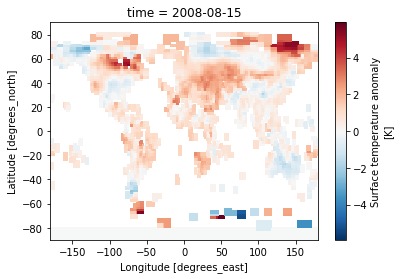

In [7]:
tempanomaly.sel(time='2008-08').squeeze().plot.pcolormesh()

## Task 2: Plot a time-series of the annual mean temperature anomaly in Bremen

This means you need to do three things:

1. Extract the monthly time-series for Bremen
2. Resample this monthly time-series to annual
3. Plot the result

The order in which you do 1. and 2. does not matter.

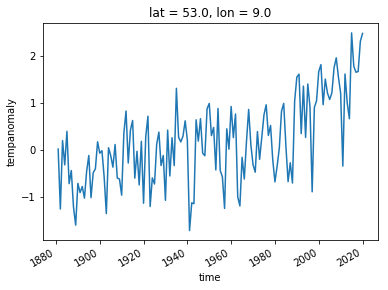

In [12]:
tempanomaly.sel(lat=53.1, lon=8.8, method='nearest').resample(time='Y').mean().plot()